In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [2]:
# -*- coding: utf-8 -*- 
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
path = r'C:\Users\judit\python\bank model\account_data.xlsx'
#path = r'D:\disc_E\my_study\bank data\account_data.xlsx'
df = pd.read_excel(path, header=0)

In [4]:
df.drop(['证件号码','客户名称','单位名称','户籍所在地','原管户客户经理','现管户客户经理'],axis=1,inplace=True)

### data cleaning

In [5]:
df.head()

,性别,年龄,婚姻状况,学历,所属行业,产品标识,五级分类,个人主要税前年收入,是否有未结清的保证人代偿贷款,最近1个月内的查询次数（贷款）,...,最近一次贷记卡逾期距今月份数,过去12个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡).1,最近一次逾期距今月份数(含贷款、贷记卡),未结清贷款余额,已使用贷记卡额度,已使用准贷记卡透支余额,当前负债汇总(含贷款、贷记卡、准贷记卡)
0,男,25,已婚,大学专科,住宿和餐饮业,个人一手车贷款,正常,100000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
1,男,30,未婚,高中,住宿和餐饮业,薪车贷（A）,正常,40000元,否,2,...,14,0.0,1.0,1.0,1.0,14,156958,10559,0.0,167517
2,男,49,已婚,初中,住宿和餐饮业,薪车贷（A）,正常,200000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,810,0.0,810
3,男,28,已婚,中专/中等技校,采矿业,薪车贷（A）,正常,70000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
4,女,34,已婚,初中,个人贷款,个人一手车贷款,正常,100000,否,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0


### Questions summary:
+ 过去24个月内逾期最长持续月份数(含贷款、贷记卡)	过去24个月内逾期最长持续月份数(含贷款、贷记卡).1 not the same, 20 records are different
+ '性别' replace '男 ' with '男'
+ '婚姻状况' merge '离异', '离婚' and ' 离婚 '
+ '学历' merge '大学本科' and '本科'
+ '五级分类' remove '\xa0' in '\xa0正常', '\xa0关注'
+ '个人主要税前年收入'contains both string and int, some records have YUAN, some have wan

### Q1 need explaination!!!

In [6]:
d0 = df[(df['过去24个月内逾期最长持续月份数(含贷款、贷记卡)']!=df['过去24个月内逾期最长持续月份数(含贷款、贷记卡).1'])]

import openpyxl

d0.to_excel(r'C:\Users\judit\python\bank model\unclear_data.xlsx')

sum(df['过去24个月内逾期最长持续月份数(含贷款、贷记卡)']==df['过去24个月内逾期最长持续月份数(含贷款、贷记卡).1'])

### Q2 '性别' replace '男 ' with '男'

In [11]:
df['性别'] = df['性别'].str.replace('男 ','男')
df['性别'].unique()

array(['男', '女'], dtype=object)

### Q2 '婚姻状况' merge '离异', '离婚' and ' 离婚 '

In [18]:
df.replace({'婚姻状况':{' 离婚 ':'离异','离婚':'离异'},'学历':{'大学本科':'本科'}},inplace=True)
#df['婚姻状况'].str.replace({' 离婚 ':'离异','离婚':'离异'},value=None)

In [32]:
l = np.sort(df['年龄'].unique())
l

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61], dtype=int64)

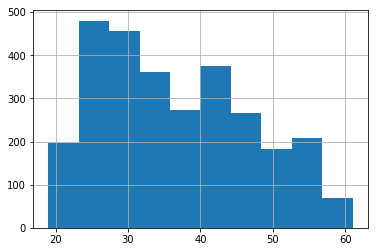

In [34]:
df['年龄'].hist()

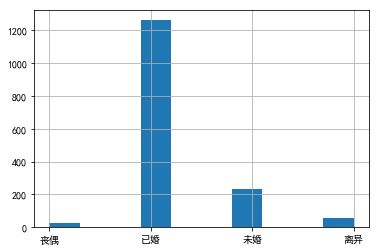

In [19]:
df['婚姻状况'].hist()

In [20]:
df['婚姻状况'].unique()

array(['已婚', '未婚', nan, '离异', '丧偶'], dtype=object)

In [21]:
df['学历'].unique()

array(['大学专科', '高中', '初中', '中专/中等技校', '未知', '本科', '小学', '技术学校', '研究生',
       '文盲或半文盲'], dtype=object)

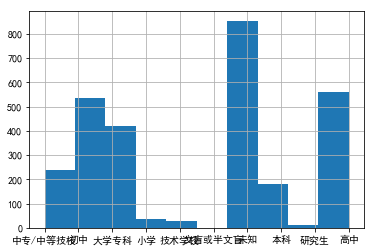

In [22]:
df['学历'].hist()

In [28]:
r1 = df.groupby('学历')['学历'].count()

In [42]:
df['五级分类'].unique()

array(['\xa0正常', '\xa0关注', '\xa0次级', '正常'], dtype=object)

In [9]:
df['个人主要税前年收入'].unique()

array(['100000元', '40000元', '200000元', '70000元', 100000, 45600, 48000,
       60000, 72000, 216000, 120000, 180000, 47604, 47000, '24万元', 360000,
       50400, 53184, 240000, 70000, 600000, 36000, 43200, 96000, 27600,
       200000, 300000, 80000, 30000, 1000000, 50000, '78000元', '150000元',
       '180000元', '50000元', '20000元', '60000元', '600000元', '500000元',
       '140000元', '300000元', '45000元', '30000元', 1080000, 84000, 33600,
       90000, 78000, 54000, 67200, 24000, 48900, 26304, 46320, 103488,
       40476, 69780, 109332, 45612, 53736, 567276, 117276, '20万', '18万元',
       '8.4万元', '6万元', '12万元', '9.6万元', '8.28万元', '18万 元', '3.6万元', '9万',
       '6.6万元', 40000, 130000, 42000, 1898694, 1260000, 4560, 114000,
       144000, 110400, 86448, 91584, 93600, 62208, 150000, 0, 20000, 10000,
       25000, 15000, 3000, 16000, 22000, 35000, 13000, 14000, 27000, 9000,
       18000, 12000, 17000, 7000, 5000, 2000, 22800, 12800, 16800, 45000,
       66000, 4000, 8000, 168000, 61200, 64800, 1152

In [8]:
df.columns

Index(['性别', '年龄', '婚姻状况', '学历', '所属行业', '产品标识', '五级分类', '个人主要税前年收入',
       '是否有未结清的保证人代偿贷款', '最近1个月内的查询次数（贷款）', '最近1个月内的查询次数（信用卡）',
       '最近1个月内的查询次数（贷款+信用卡）', '最近6个月内的查询次数（贷款）', '最近6个月内的查询次数（信用卡）',
       '最近6个月内的查询次数（贷款+信用卡）', '未结清贷款笔数', '未结清贷款机构数', '未销户的贷记卡发卡机构数',
       '未结清贷款涉及到非银行类金融机构的机构数', '未结清的个人消费或其他贷款涉及到金融机构的机构数', '当前逾期期数最大值(贷款)',
       '当前逾期期数最大值(贷记卡)', '当前逾期期数最大值(含贷款、贷记卡)', '当前逾期的贷款账户数', '当前逾期的贷记卡账户数',
       '当前逾期的贷款、贷记卡账户数总和', '过去12个月内贷款逾期月份数', '过去24个月内贷款逾期月份数',
       '过去12个月内贷款逾期最长持续月份数', '过去24个月内贷款逾期最长持续月份数', '最近一次贷款逾期距今月份数',
       '过去12个月内贷记卡逾期月份数', '过去24个月内贷记卡逾期月份数', '过去12个月内货记卡逾期最长持续月份数',
       '过去24个月内贷记卡逾期最长持续月份数', '最近一次贷记卡逾期距今月份数', '过去12个月内逾期月份数(含贷款、贷记卡)',
       '过去24个月内逾期月份数(含贷款、贷记卡)', '过去24个月内逾期最长持续月份数(含贷款、贷记卡)',
       '过去24个月内逾期最长持续月份数(含贷款、贷记卡).1', '最近一次逾期距今月份数(含贷款、贷记卡)', '未结清贷款余额',
       '已使用贷记卡额度', '已使用准贷记卡透支余额', '当前负债汇总(含贷款、贷记卡、准贷记卡)'],
      dtype='object')

In [6]:
dict= {'性别':'sex', '年龄':'age', '婚姻状况':'marriage_state', '学历':'education', '所属行业':'professional_field', \
       '产品标识':'applied_product', '五级分类':'classes_5', '个人主要税前年收入':'annual_income',
       '是否有未结清的保证人代偿贷款':'unpaied_loan_guarantor', '最近1个月内的查询次数（贷款）':'query_loan_1m', \
       '最近1个月内的查询次数（信用卡）':'query_credict_1m',
       '最近1个月内的查询次数（贷款+信用卡）':'query_locre_1m', '最近6个月内的查询次数（贷款）':'query_loan_6m', \
       '最近6个月内的查询次数（信用卡）':'query_credict_6m',
       '最近6个月内的查询次数（贷款+信用卡）':'query_locre_6m', '未结清贷款笔数':'num_unpaid_loans', '未结清贷款机构数':'num_unpaid_organizations',\
       '未销户的贷记卡发卡机构数':'undelete_credict_organizations_num','未结清贷款涉及到非银行类金融机构的机构数':'unpaid_loan_unbank_org_num',\
       '未结清的个人消费或其他贷款涉及到金融机构的机构数':'unpaid_other_fina_org_num',\
       '当前逾期期数最大值(贷款)':'maximum_excess_loan','当前逾期期数最大值(贷记卡)':'maximum_excess_credit',\
       '当前逾期期数最大值(含贷款、贷记卡)':'maximum_excess_loan_credit',\
       '当前逾期的贷款账户数':'maximum_excess_loan_accounts','当前逾期的贷记卡账户数':'maximum_excess_credit_accounts',\
       '当前逾期的贷款、贷记卡账户数总和':'maximum_excess_loan_credit_accounts',\
       '过去12个月内贷款逾期月份数':'num_excess_month_loan12','过去24个月内贷款逾期月份数':'num_excess_month_loan24',\
       '过去12个月内贷款逾期最长持续月份数':'lasting_month_loan12','过去24个月内贷记卡逾期最长持续月份数':'lasting_month_loan24',\
       '最近一次贷款逾期距今月份数':'duration_last_unpaid_loan','过去12个月内贷记卡逾期月份数':'num_excess_month_credit12',\
       '过去24个月内贷记卡逾期月份数':'num_excess_month_credit24',\
       '过去12个月内货记卡逾期最长持续月份数':'lasting_month_credit12','最近一次贷记卡逾期距今月份数':'duration_last_unpaid_credit',\
       '过去12个月内逾期月份数(含贷款、贷记卡)':'num_excess_month_locre12','过去24个月内逾期月份数(含贷款、贷记卡)':'num_excess_month_locre24',\
       '过去24个月内逾期最长持续月份数(含贷款、贷记卡)':'lasting_month_lacre24',\
       '过去24个月内逾期最长持续月份数(含贷款、贷记卡).1':'lasting_month_lacre24a',\
       '最近一次逾期距今月份数(含贷款、贷记卡)':'duration_last_unpaid_locred','未结清贷款余额':'unpaid_loan_amount',\
       '已使用贷记卡额度':'used_credit','已使用准贷记卡透支余额':'used_quasi_credit',\
       '当前负债汇总(含贷款、贷记卡、准贷记卡)':'total_debts'}

In [9]:
#df.columns
col = ['sex','age','marriage_state','education','professional_field',\
       'applied_product','classes_5', 'annual_income',\
       'unpaied_loan_guarantor','query_loan_1m','query_credict_1m','query_locre_1m',
      'query_loan_6m','query_credict_6m','query_locre_6m','num_unpaid_loans',\
      'num_unpaid_organizations','undelete_credict_organizations',\
      'unpaid_loan_unbank_org','unpaid_other_fina_org','']

,性别,年龄,婚姻状况,学历,所属行业,产品标识,五级分类,个人主要税前年收入,是否有未结清的保证人代偿贷款,最近1个月内的查询次数（贷款）,...,最近一次贷记卡逾期距今月份数,过去12个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡).1,最近一次逾期距今月份数(含贷款、贷记卡),未结清贷款余额,已使用贷记卡额度,已使用准贷记卡透支余额,当前负债汇总(含贷款、贷记卡、准贷记卡)
0,男,25,已婚,大学专科,住宿和餐饮业,个人一手车贷款,正常,100000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
1,男,30,未婚,高中,住宿和餐饮业,薪车贷（A）,正常,40000元,否,2,...,14,0.0,1.0,1.0,1.0,14,156958,10559,0.0,167517
2,男,49,已婚,初中,住宿和餐饮业,薪车贷（A）,正常,200000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,810,0.0,810
3,男,28,已婚,中专/中等技校,采矿业,薪车贷（A）,正常,70000元,否,0,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
4,女,34,已婚,初中,个人贷款,个人一手车贷款,正常,100000,否,1,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0


In [13]:
df['学历'].unique()

array(['大学专科', '高中', '初中', '中专/中等技校', '未知', '本科', '小学', '技术学校', '研究生',
       '文盲或半文盲'], dtype=object)

In [19]:
df['当前逾期期数最大值(贷款)'].unique()

array([0.000e+00, 1.000e+00,       nan, 1.998e+04, 1.500e+02, 1.390e+02,
       7.000e+00, 2.289e+03, 1.000e+03])

In [22]:
df['五级分类'].unique()

array(['\xa0正常', '\xa0关注', '\xa0次级', '正常'], dtype=object)

In [23]:
df['所属行业'].unique()

array(['住宿和餐饮业', '采矿业', '个人贷款', '信息传输、软件和信息技术服务业', '建筑业', '居民服务、修理和其他服务业',
       '农、林、牧、渔业', '交通运输、仓储和邮政业', '批发和零售业', '房地产业', '租赁和商务服务业',
       '公共管理、社会保障和社会组织', '金融业', '制造业', '卫生和社会工作', '文化、体育和娱乐业',
       '电力、热力、燃气及水生产和供应业', '教育', '科学研究和技术服务业', '无', '农林牧渔业', '养殖',
       '水利、环境和公共设施管理业', '服务业', 0, '批发业', '水利、环保、公共设施管理', '电力、热力、燃气及水生产和供应',
       '租赁和商业服务业', '电力、热力、燃烧及水生产和供应业', '公共管理、社会保障和社会保障', '信息传输、软件和信息技术服务',
       nan, '批发和零售业务', '居民服务、修路和其他服务'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 46 columns):
性别                             2868 non-null object
年龄                             2868 non-null int64
婚姻状况                           1578 non-null object
学历                             2868 non-null object
单位名称                           2852 non-null object
所属行业                           2852 non-null object
产品标识                           2868 non-null object
五级分类                           2868 non-null object
个人主要税前年收入                      2867 non-null object
是否有未结清的保证人代偿贷款                 2868 non-null object
最近1个月内的查询次数（贷款）                2868 non-null int64
最近1个月内的查询次数（信用卡）               2867 non-null float64
最近1个月内的查询次数（贷款+信用卡）            2867 non-null float64
最近6个月内的查询次数（贷款）                2866 non-null float64
最近6个月内的查询次数（信用卡）               2868 non-null int64
最近6个月内的查询次数（贷款+信用卡）            2868 non-null int64
未结清贷款笔数                        2868 non-null int64
未结清贷款机构数   

In [28]:
df[df['婚姻状况'].isnull()]

,性别,年龄,婚姻状况,学历,单位名称,所属行业,产品标识,五级分类,个人主要税前年收入,是否有未结清的保证人代偿贷款,...,最近一次贷记卡逾期距今月份数,过去12个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡),过去24个月内逾期最长持续月份数(含贷款、贷记卡).1,最近一次逾期距今月份数(含贷款、贷记卡),未结清贷款余额,已使用贷记卡额度,已使用准贷记卡透支余额,当前负债汇总(含贷款、贷记卡、准贷记卡)
15,女,44,NaN,初中,朔州市朔城区焦三女食品店,居民服务、修理和其他服务业,个人一手车贷款,正常,24万元,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
16,男,35,NaN,大学专科,嘉合伟业房地产经纪公司,房地产业,个人一手车贷款,正常,60000,无,...,0,0.0,0.0,0.0,0.0,0,0,6974,0.0,6974
201,女,50,NaN,未知,汇富贵休闲服装店,住宿和餐饮业,个人一手车贷款,正常,100000,无,...,27个月,0.0,0.0,0.0,0.0,0,285167,NaN,51562.0,336729
202,女,34,NaN,高中,光丽达广告传媒有限公司,住宿和餐饮业,个人一手车贷款,关注,50000,无,...,0,0.0,0.0,0.0,0.0,0,0,10000,0.0,1353
203,男,22,NaN,未知,富士康,住宿和餐饮业,个人一手车贷款,正常,50000,无,...,0,0.0,0.0,0.0,0.0,0,0,16000,0.0,10761
204,男,24,NaN,初中,山西金生机械工程有限公司,住宿和餐饮业,个人一手车贷款,次级,200000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
205,男,22,NaN,技术学校,太原市金水水果经销部,住宿和餐饮业,个人一手车贷款,正常,200000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
206,男,40,NaN,未知,东辰祥瑞项目,信息传输、软件和信息技术服务业,个人一手车贷款,正常,100000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
207,男,26,NaN,未知,山西新天誉科技有限公司,住宿和餐饮业,个人一手车贷款,关注,100000,无,...,48个月,0.0,0.0,0.0,0.0,0,0,17000,0.0,16702
208,男,25,NaN,中专/中等技校,山西奥凯建筑有限公司,建筑业,个人一手车贷款,正常,50000,无,...,0,0.0,0.0,0.0,0.0,0,0,0,0.0,0
